In [1]:
import numpy as np
import pandas as pd
from sklearn import *
import nltk, datetime

train = pd.read_csv('../data/raw/sales_train.csv')
test = pd.read_csv('../data/raw/test.csv')
submission = pd.read_csv('../data/raw/sample_submission.csv')
items = pd.read_csv('../data/raw/items.csv')
item_cats = pd.read_csv('../data/raw/item_categories.csv')
shops = pd.read_csv('../data/raw/shops.csv')



print("train: ", train.shape, 'test: ', test.shape)

C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning

train:  (2935849, 6) test:  (214200, 3)


In [2]:
# converting gz file to csv
# import gzip    

# list_files = ['../data/raw/sales_train.csv.gz', '../data/raw/sample_submission.csv.gz' , '../data/raw/test.csv.gz']

# for filename in list_files:
#   with gzip.open(filename, 'rt') as f:
#     data = f.read()
#     with open(filename[:-3], 'wt') as f:
#       f.write(data)

In [3]:
[c for c in train.columns if c not in test.columns]
#test.head()

['date', 'date_block_num', 'item_price', 'item_cnt_day']

In [4]:
train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [5]:
test.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [6]:
# Text features
feature_cnt = 25
tfidf = feature_extraction.text.TfidfVectorizer(max_features = feature_cnt)
items['item_name_len'] = items['item_name'].map(len) # length of item name description
items['item_name_wc'] = items['item_name'].map(lambda x: len(str(x).split(' '))) # Item Description Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(items['item_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    items['item_name_tfidf_'+ str(i)] = txtFeatures[cols[i]]
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  item_name_len  item_name_wc  item_name_tfidf_0  \
0                40             41            14                0.0   
1                76             68             9                0.0   
2                40             45            26                0.0   
3                40             47            26                0.0   
4                40             43            25                0.0   

   item_name_tfidf_1  item_name_tfidf_2  item_name_tfidf_3  item_name_tfidf_4  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

          ...          item_name_tfidf_15  item_name_tfidf_16  \
0         ...                         0.0            0.000000   
1         ...                         0.0            0.403761   
2         ...                         0.0            0.000000   
3         ...                         0.0            0.000000   
4         ...                         0.0            0.000000   

   item_name_tfidf_17  item_name_tfidf_18  item_name_tfidf_19  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   item_name_tfidf_20  item_name_tfidf_21  item_name_tfidf_22  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   item_name_tfidf_23  item_name_tfidf_24  
0                 0.0            0.000000  
1                 0.0            0.483839  
2                 0.0            0.000000  
3                 0.0            0.000000  
4                 0.0            0.000000  

[5 rows x 30 columns]

In [7]:

# Text features
feature_cnt = 25
tfidf = feature_extraction.text.TfidfVectorizer(max_features = feature_cnt)
item_cats['item_category_name_len'] = item_cats['item_category_name'].map(len) # length of Item Category Description
item_cats['item_category_name_wc'] = item_cats['item_category_name'].map(lambda x: len(str(x).split(' '))) # item caategory description wod count
txtFeatures = pd.DataFrame(tfidf.fit_transform(item_cats['item_category_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    item_cats['item_category_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
item_cats.head()

item_category_name  item_category_id  item_category_name_len  \
0  PC - Гарнитуры/Наушники                 0                      23   
1         Аксессуары - PS2                 1                      16   
2         Аксессуары - PS3                 2                      16   
3         Аксессуары - PS4                 3                      16   
4         Аксессуары - PSP                 4                      16   

   item_category_name_wc  item_category_name_tfidf_0  \
0                      3                         0.0   
1                      3                         0.0   
2                      3                         0.0   
3                      3                         0.0   
4                      3                         0.0   

   item_category_name_tfidf_1  item_category_name_tfidf_2  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   item_category_name_tfidf_3  item_category_name_tfidf_4  \
0                         1.0                    0.000000   
1                         0.0                    0.780837   
2                         0.0                    0.000000   
3                         0.0                    0.000000   
4                         0.0                    0.000000   

   item_category_name_tfidf_5             ...               \
0                    0.000000             ...                
1                    0.000000             ...                
2                    0.780837             ...                
3                    0.000000             ...                
4                    0.000000             ...                

   item_category_name_tfidf_15  item_category_name_tfidf_16  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   item_category_name_tfidf_17  item_category_name_tfidf_18  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   item_category_name_tfidf_19  item_category_name_tfidf_20  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   item_category_name_tfidf_21  item_category_name_tfidf_22  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   item_category_name_tfidf_23  item_category_name_tfidf_24  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 29 columns]

In [8]:
# Text features 
feature_cnt = 25
tfidf = feature_extraction.text.TfidfVectorizer(max_features=feature_cnt)
shops['shop_name_len'] = shops['shop_name'].map(len)  #Lenth of Shop Name
shops['shop_name_wc'] = shops['shop_name'].map(lambda x: len(str(x).split(' '))) #Shop Name Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(shops['shop_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    shops['shop_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
shops.head()

shop_name  shop_id  shop_name_len  shop_name_wc  \
0   !Якутск Орджоникидзе, 56 фран        0             29             4   
1   !Якутск ТЦ "Центральный" фран        1             29             4   
2                Адыгея ТЦ "Мега"        2             16             3   
3  Балашиха ТРК "Октябрь-Киномир"        3             30             3   
4        Волжский ТЦ "Волга Молл"        4             24             4   

   shop_name_tfidf_0  shop_name_tfidf_1  shop_name_tfidf_2  shop_name_tfidf_3  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   shop_name_tfidf_4  shop_name_tfidf_5         ...          \
0                0.0                0.0         ...           
1                0.0                0.0         ...           
2                0.0                0.0         ...           
3                0.0                0.0         ...           
4                0.0                0.0         ...           

   shop_name_tfidf_15  shop_name_tfidf_16  shop_name_tfidf_17  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   shop_name_tfidf_18  shop_name_tfidf_19  shop_name_tfidf_20  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 0.0                 0.0   

   shop_name_tfidf_21  shop_name_tfidf_22  shop_name_tfidf_23  \
0            0.000000                 0.0            0.000000   
1            0.322815                 0.0            0.689588   
2            0.498580                 0.0            0.000000   
3            0.000000                 0.0            0.000000   
4            0.423972                 0.0            0.000000   

   shop_name_tfidf_24  
0            1.000000  
1            0.648274  
2            0.000000  
3            0.000000  
4            0.000000  

[5 rows x 29 columns]

In [9]:
# Make monthly
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['month'] = train['date'].dt.month 
train['year'] = train['date'].dt.year
train = train.drop(['date', 'item_price'], axis=1)
train = train.groupby([c for c in train.columns if c not in ['item_cnt_day']], as_index = False)[['item_cnt_day']].sum()
train = train.rename(columns={'item_cnt_day': 'item_cnt_month'})

# Monthly mean
shop_item_month_mean = train[['shop_id', 'item_id', 'item_cnt_month']].groupby(['shop_id', 'item_id'], as_index=False)[['item_cnt_month']].mean()
shop_item_monthly_mean = shop_item_month_mean.rename(columns={'item_cnt_month':'item_cnt_month_mean'})

# Add mean feature
train = pd.merge(train, shop_item_monthly_mean, how='left', on=['shop_id', 'item_id'])

# Last month (Oct 2015)
shop_item_prev_month = train[train['date_block_num'] == 33][['shop_id','item_id','item_cnt_month']]
shop_item_prev_month = shop_item_prev_month.rename(columns={'item_cnt_month':'item_cnt_prev_month'})
shop_item_prev_month.head()

# Add previous month feature
train = pd.merge(train, shop_item_prev_month, how='left', on=['shop_id', 'item_id']).fillna(0.)
#Items features
train = pd.merge(train, items, how='left', on='item_id')
# Item category features
train = pd.merge(train, item_cats, how='left', on='item_category_id')
# Shops features
train = pd.merge(train, shops, how='left', on='shop_id')
train.head()


date_block_num  shop_id  item_id  month  year  item_cnt_month  \
0               0        0       32      1  2013             6.0   
1               0        0       33      1  2013             3.0   
2               0        0       35      1  2013             1.0   
3               0        0       43      1  2013             1.0   
4               0        0       51      1  2013             2.0   

   item_cnt_month_mean  item_cnt_prev_month  \
0                  8.0                  0.0   
1                  3.0                  0.0   
2                  7.5                  0.0   
3                  1.0                  0.0   
4                  2.5                  0.0   

                                           item_name  item_category_id  \
0                                                1+1                40   
1                                           1+1 (BD)                37   
2                                      10 ЛЕТ СПУСТЯ                40   
3                                 100 МИЛЛИОНОВ ЕВРО                40   
4  100 лучших произведений классики (mp3-CD) (Dig...                57   

          ...          shop_name_tfidf_15  shop_name_tfidf_16  \
0         ...                         0.0                 0.0   
1         ...                         0.0                 0.0   
2         ...                         0.0                 0.0   
3         ...                         0.0                 0.0   
4         ...                         0.0                 0.0   

   shop_name_tfidf_17  shop_name_tfidf_18  shop_name_tfidf_19  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   shop_name_tfidf_20  shop_name_tfidf_21  shop_name_tfidf_22  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   shop_name_tfidf_23  shop_name_tfidf_24  
0                 0.0                 1.0  
1                 0.0                 1.0  
2                 0.0                 1.0  
3                 0.0                 1.0  
4                 0.0                 1.0  

[5 rows x 93 columns]

In [10]:
test['month'] = 11
test['year'] = 2015
test['date_block_num'] = 34

# Add mean feature
test = pd.merge(test, shop_item_monthly_mean, how='left', on=['shop_id', 'item_id']).fillna(0.)

# Add Previous Month Feature
test = pd.merge(test, shop_item_prev_month, how='left', on=['shop_id', 'item_id']).fillna(0.)

# Items features 
test =  pd.merge(test, items, how='left', on='item_id')

# Item Category features
test = pd.merge(test, item_cats, how='left', on='item_category_id')
#Shops features
test = pd.merge(test, shops, how='left', on='shop_id')
test['item_cnt_month'] = 0.
test.head()


ID  shop_id  item_id  month  year  date_block_num  item_cnt_month_mean  \
0   0        5     5037     11  2015              34             1.444444   
1   1        5     5320     11  2015              34             0.000000   
2   2        5     5233     11  2015              34             2.000000   
3   3        5     5232     11  2015              34             1.000000   
4   4        5     5268     11  2015              34             0.000000   

   item_cnt_prev_month                                          item_name  \
0                  0.0                     NHL 15 [PS3, русские субтитры]   
1                  0.0                    ONE DIRECTION  Made In The A.M.   
2                  1.0  Need for Speed Rivals (Essentials) [PS3, русск...   
3                  0.0  Need for Speed Rivals (Classics) [Xbox 360, ру...   
4                  0.0               Need for Speed [PS4, русская версия]   

   item_category_id       ...        shop_name_tfidf_16  shop_name_tfidf_17  \
0                19       ...                       0.0                 0.0   
1                55       ...                       0.0                 0.0   
2                19       ...                       0.0                 0.0   
3                23       ...                       0.0                 0.0   
4                20       ...                       0.0                 0.0   

   shop_name_tfidf_18  shop_name_tfidf_19  shop_name_tfidf_20  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   shop_name_tfidf_21  shop_name_tfidf_22  shop_name_tfidf_23  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   shop_name_tfidf_24  item_cnt_month  
0                 0.0             0.0  
1                 0.0             0.0  
2                 0.0             0.0  
3                 0.0             0.0  
4                 0.0             0.0  

[5 rows x 94 columns]

### Visualize

C:\Users\lokesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


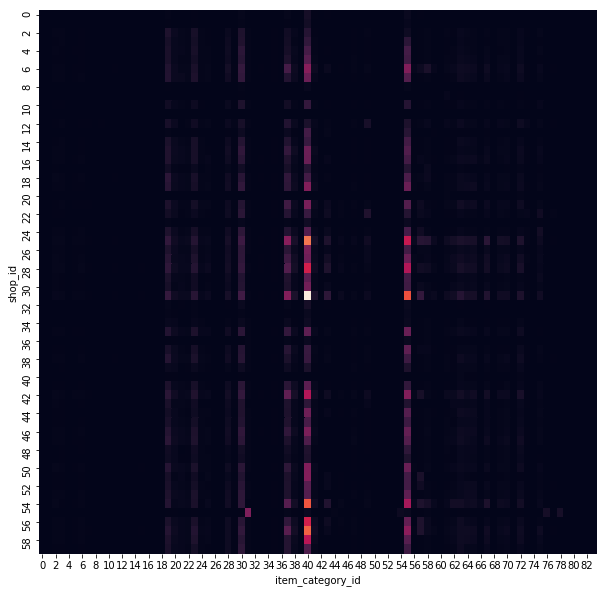

In [12]:
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_all = pd.concat((train, test), axis=0, ignore_index=True)
stores_hm = df_all.pivot_table(index='shop_id', columns='item_category_id', values='item_cnt_month', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(10,10))

_ = sns.heatmap(stores_hm, ax=ax, cbar=False)


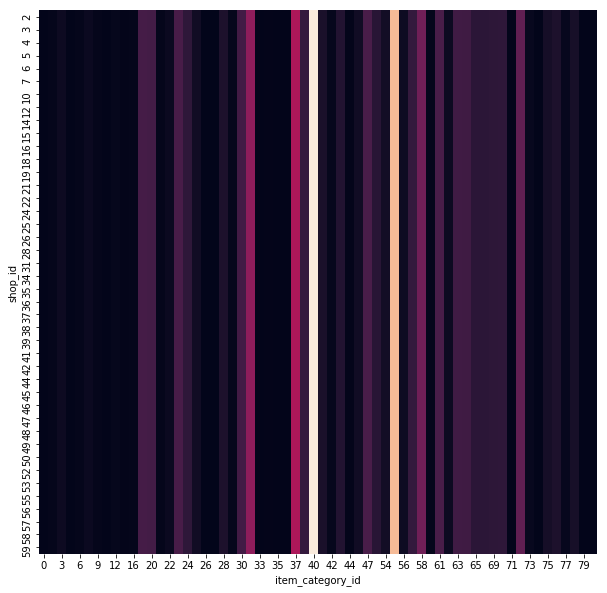

In [13]:
stores_hm = test.pivot_table(index='shop_id', columns='item_category_id', values='item_cnt_month', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(10,10))
_ = sns.heatmap(stores_hm, ax=ax, cbar=False)

Label Encoding

Try different approaches - weight based sequence, etc.



In [14]:
for c in ['shop_name','item_name','item_category_name']:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[c].unique()) + list(test[c].unique()))
    train[c] = lbl.transform(train[c].astype(str))
    test[c] = lbl.transform(test[c].astype(str))
    print(c)

shop_name
item_name
item_category_name


##### Train & Predict Models

In [15]:
col = [c for c in train.columns if c not in ['item_cnt_month']]
# Validation hold out month 
x1 = train[train['date_block_num'] < 33]
y1 = np.log1p(x1['item_cnt_month'].clip(0.,20.))
x1 = x1[col]
x2 = train[train['date_block_num'] == 33]
y2 = np.log1p(x2['item_cnt_month'].clip(0.,20.))
x2 = x2[col]

reg = ensemble.ExtraTreesRegressor(n_estimators=25, n_jobs=-1, max_depth=15, random_state=18)
reg.fit(x1, y1)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), reg.predict(x2).clip(0.,20.))))
# full train
reg.fit(train[col], train['item_cnt_month'].clip(0., 20.))
test['item_cnt_month'] = reg.predict(test[col]).clip(0., 20.)
test[['ID', 'item_cnt_month']].to_csv('submission.csv', index=False)

RMSE: 0.27595668657276884


Happy Kaggling :)

    Try XGBoost, LightGBM, CatBoost next

    Try some more Scikit-Learn Linear Regressors and more

    Also try TensorFlow, Keras, PyTorch or other NN models for extra fun

    Add more text features

    Make some ensembles

    Tune your models further

    Add some awesome visualizations

    Comment on Kernels for feedback, fork some, share your own versions

Have some fun!


Getting Started with More Models

    Off to model tuning land you go now...

In [32]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from multiprocessing import *

#XGBoost
def xgb_rmse(preds, y):
    y = y.get_label()
    score = np.sqrt(metrics.mean_squared_error(y.clip(0.,20.), preds.clip(0.,20.)))
    return 'RMSE', score

params = {'eta': 0.2, 'max_depth': 4, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'seed': 18, 'silent': True}
#watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
#xgb_model = xgb.train(params, xgb.DMatrix(x1, y1), 100,  watchlist, verbose_eval=10, feval=xgb_rmse, maximize=False, early_stopping_rounds=20)
#test['item_cnt_month'] = xgb_model.predict(xgb.DMatrix(test[col]), ntree_limit=xgb_model.best_ntree_limit)
#test[['ID','item_cnt_month']].to_csv('xgb_submission.csv', index=False)

#LightGBM
def lgb_rmse(preds, y):
    y = np.array(list(y.get_label()))
    score = np.sqrt(metrics.mean_squared_error(y.clip(0.,20.), preds.clip(0.,20.)))
    return 'RMSE', score, False

params = {'learning_rate': 0.2, 'max_depth': 7, 'boosting': 'gbdt', 'objective': 'regression', 'metric': 'mse', 'is_training_metric': False, 'seed': 18}
#lgb_model = lgb.train(params, lgb.Dataset(x1, label=y1), 100, lgb.Dataset(x2, label=y2), feval=lgb_rmse, verbose_eval=10, early_stopping_rounds=20)
#test['item_cnt_month'] = lgb_model.predict(test[col], num_iteration=lgb_model.best_iteration)
#test[['ID','item_cnt_month']].to_csv('lgb_submission.csv', index=False)

#CatBoost
cb_model = CatBoostRegressor(iterations=100, learning_rate=0.2, depth=7, loss_function='RMSE', eval_metric='RMSE', random_seed=18, od_type='Iter', od_wait=20) 
cb_model.fit(x1, y1, eval_set=(x2, y2), use_best_model=True, verbose=False)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), cb_model.predict(x2).clip(0.,20.))))
test['item_cnt_month'] += cb_model.predict(test[col])
test['item_cnt_month'] /= 2
test[['ID','item_cnt_month']].to_csv('../data/processed/cb_blend_submission.csv', index=False)

ModuleNotFoundError: No module named 'catboost'

In [33]:
x1

date_block_num  shop_id  item_id  month  year  item_cnt_month_mean  \
0                     0        0       32      1  2013             8.000000   
1                     0        0       33      1  2013             3.000000   
2                     0        0       35      1  2013             7.500000   
3                     0        0       43      1  2013             1.000000   
4                     0        0       51      1  2013             2.500000   
5                     0        0       61      1  2013             1.000000   
6                     0        0       75      1  2013             1.000000   
7                     0        0       88      1  2013             1.000000   
8                     0        0       95      1  2013             1.000000   
9                     0        0       96      1  2013             1.000000   
10                    0        0       98      1  2013            15.000000   
11                    0        0      111      1  2013             1.000000   
12                    0        0      149      1  2013             3.000000   
13                    0        0      151      1  2013             1.000000   
14                    0        0      153      1  2013             1.500000   
15                    0        0      198      1  2013             1.000000   
16                    0        0      210      1  2013             2.000000   
17                    0        0      282      1  2013             1.000000   
18                    0        0      306      1  2013             1.000000   
19                    0        0      351      1  2013             1.000000   
20                    0        0      421      1  2013             1.000000   
21                    0        0      438      1  2013             1.000000   
22                    0        0      482      1  2013             2.500000   
23                    0        0      484      1  2013             4.000000   
24                    0        0      491      1  2013             1.000000   
25                    0        0      498      1  2013             1.000000   
26                    0        0      556      1  2013             6.500000   
27                    0        0      642      1  2013             5.000000   
28                    0        0      651      1  2013             7.000000   
29                    0        0      657      1  2013             3.000000   
...                 ...      ...      ...    ...   ...                  ...   
1577563              32       59    20305      9  2015             1.000000   
1577564              32       59    20335      9  2015             1.000000   
1577565              32       59    20338      9  2015             1.428571   
1577566              32       59    20354      9  2015             1.000000   
1577567              32       59    20434      9  2015             1.000000   
1577568              32       59    20448      9  2015             1.000000   
1577569              32       59    20609      9  2015             1.636364   
1577570              32       59    20623      9  2015             1.000000   
1577571              32       59    20626      9  2015             1.000000   
1577572              32       59    20629      9  2015             1.800000   
1577573              32       59    20866      9  2015             1.615385   
1577574              32       59    20949      9  2015            71.774194   
1577575              32       59    21363      9  2015             1.000000   
1577576              32       59    21364      9  2015             4.142857   
1577577              32       59    21367      9  2015             2.666667   
1577578              32       59    21369      9  2015             1.500000   
1577579              32       59    21443      9  2015             1.000000   
1577580              32       59    21459      9  2015             1.000000   
1577581              32       59    21624      9  2015     